In [1]:
# The Iris classification problem
# https://github.com/tensorflow/models/blob/master/samples/core/tutorials/eager/custom_training_walkthrough.ipynb

# Setup the Program
# Configure imports and eager execution
# Trained in Google Colab

from __future__ import absolute_import, division, print_function

import os
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.contrib.eager as tfe

tf.enable_eager_execution()

print("TensorFlow Version: {}".format(tf.VERSION))
print("Eager Execution: {}".format(tf.executing_eagerly()))


TensorFlow Version: 1.10.0-rc1
Eager Execution: True


In [2]:
# Import and parse the training dataset
## Download the dataset file and convert it into a structure that can be used by this Python program.

# Download the dataset
## Download the training dataset file using the tf.keras.utils.get_file function. This returns the file path of the downloaded file.

train_dataset_url = "http://download.tensorflow.org/data/iris_training.csv"

train_dataset_file_path = tf.keras.utils.get_file(fname = os.path.basename(train_dataset_url), origin = train_dataset_url)

print("Local copy of dataset: {}".format(train_dataset_url))

Local copy of dataset: http://download.tensorflow.org/data/iris_training.csv


In [3]:
# Inspect the data
# Use the head -n5 command to take a peak at the first five entries

!head -n5 {train_dataset_file_path}


120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


In [4]:
# column order in CSV file
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
feature_names = column_names[:-1]
label_names = column_names[-1]

print("feature names: {}".format(feature_names))
print("label names: {}".format(label_names))

feature names: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
label names: species


In [0]:
# 0: Iris setosa
# 1: Iris versicolor
# 2: Iris virginica
class_name = ['Iris setosa', 'Iris versicolor', 'Iris virginica']


In [0]:
# Create a tf.data.Dataset

batch_size = 32

train_dataset = tf.contrib.data.make_csv_dataset(train_dataset_file_path, 
                                      batch_size, 
                                      label_name = label_names, 
                                      column_names = column_names, 
                                      num_epochs = 1)

In [7]:
# With eager execution enabled, these Dataset objects are iterable.
features, labels = next(iter(train_dataset))
features


OrderedDict([('sepal_length',
              <tf.Tensor: id=60, shape=(32,), dtype=float32, numpy=
              array([5.6, 4.9, 5.8, 5.1, 4.6, 5.7, 5.4, 5. , 6. , 6.9, 5.4, 6. , 5.5,
                     5.9, 6. , 6.7, 7.2, 4.9, 6.4, 5. , 5.8, 6.3, 6.5, 4.8, 6.3, 4.6,
                     5.4, 6.3, 6.1, 5.8, 6.7, 6. ], dtype=float32)>),
             ('sepal_width',
              <tf.Tensor: id=61, shape=(32,), dtype=float32, numpy=
              array([2.7, 2.4, 2.7, 3.8, 3.6, 2.8, 3. , 3.2, 2.2, 3.1, 3.9, 3. , 2.4,
                     3. , 2.9, 3.1, 3.2, 2.5, 2.8, 3.5, 2.7, 2.7, 2.8, 3.4, 2.5, 3.1,
                     3.9, 2.3, 2.8, 2.7, 3.1, 2.7], dtype=float32)>),
             ('petal_length',
              <tf.Tensor: id=58, shape=(32,), dtype=float32, numpy=
              array([4.2, 3.3, 5.1, 1.6, 1. , 4.1, 4.5, 1.2, 5. , 5.1, 1.3, 4.8, 3.8,
                     5.1, 4.5, 4.4, 6. , 4.5, 5.6, 1.6, 5.1, 4.9, 4.6, 1.6, 5. , 1.5,
                     1.7, 4.4, 4. , 4.1, 5.6, 5.1],

Text(0,0.5,'sepal_length')

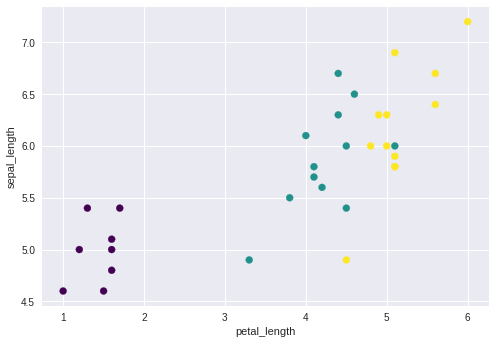

In [8]:
# clusters by plotting a few features from the batch
plt.scatter(features['petal_length'], 
           features['sepal_length'], 
           c = labels,
           cmap='viridis')

plt.xlabel('petal_length')
plt.ylabel('sepal_length')

In [0]:
# create a function to repackage the features dictionary into a single array with shape: (batch_size, num_features)
# This function uses the tf.stack method which takes values from a list of tensors and creates a combined tensor at the specified dimension.
def pack_feature_vector(features, labels):
  # pack the features into a single array
  features = tf.stack(list(features.values()), axis = 1)
  return features, labels

In [0]:
# Then use the tf.data.Dataset.map method to pack the features of each (features,label) pair into the training dataset
train_dataset = train_dataset.map(pack_feature_vector)


In [11]:
# check the results
features, labels = next(iter(train_dataset))
print(features[:5])

tf.Tensor(
[[5.6 2.9 3.6 1.3]
 [6.1 2.9 4.7 1.4]
 [4.5 2.3 1.3 0.3]
 [7.  3.2 4.7 1.4]
 [5.1 3.8 1.9 0.4]], shape=(5, 4), dtype=float32)


In [0]:
# Create a model using Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(3)
])

In [13]:
# Using the model
predictions = model(features)
predictions[:5]

<tf.Tensor: id=207, shape=(5, 3), dtype=float32, numpy=
array([[ 0.6022174 , -0.84608465, -0.16978204],
       [ 0.59879875, -0.8756122 , -0.13861334],
       [ 0.5448942 , -0.74825543, -0.41758808],
       [ 0.70514214, -0.9941317 , -0.19577044],
       [ 0.48032114, -1.0012796 , -0.62517655]], dtype=float32)>

In [14]:
# To convert these logits to a probability for each class, use the softmax function
tf.nn.softmax(predictions[:5])

# Taking the tf.argmax across classes gives us the predicted class index
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
    Labels: [1 1 0 1 0 2 2 2 0 0 0 1 1 2 2 2 2 0 0 0 1 2 2 1 1 2 0 0 1 0 1 2]


In [15]:
# Train the model
# Define the loss and gradient function
def loss(x, y, model):
  y_ = model(x)
  return tf.losses.sparse_softmax_cross_entropy(labels=y, logits=y_)

l = loss(features, labels, model)
print("Loss test: {}".format(l))

Loss test: 1.17226243019104


In [0]:
# Use the tf.GradientTape context to calculate the gradients used to optimize our model
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(inputs, targets, model)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [0]:
# Create an optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)

# setup the optimizer and the global_step counter
global_step = tf.train.get_or_create_global_step()


In [18]:
# calculate a single optimization step
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(global_step.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.variables), global_step)
print("Step: {},         Loss: {}".format(global_step.numpy(),
                                          loss(features, labels, model).numpy()))

Step: 0, Initial Loss: 1.17226243019104
Step: 1,         Loss: 1.0696243047714233


In [19]:
# Training loop
## Note: Rerunning this cell uses the same model variables

# keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tfe.metrics.Mean()
  epoch_accuracy = tfe.metrics.Accuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.variables),
                              global_step)

    # Track progress
    epoch_loss_avg(loss_value)  # add current batch loss
    # compare predicted label to actual label
    epoch_accuracy(tf.argmax(model(x), axis=1, output_type=tf.int32), y)

  # end epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())
  
  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 0.966, Accuracy: 68.333%
Epoch 050: Loss: 0.083, Accuracy: 98.333%
Epoch 100: Loss: 0.059, Accuracy: 98.333%
Epoch 150: Loss: 0.069, Accuracy: 97.500%
Epoch 200: Loss: 0.045, Accuracy: 99.167%


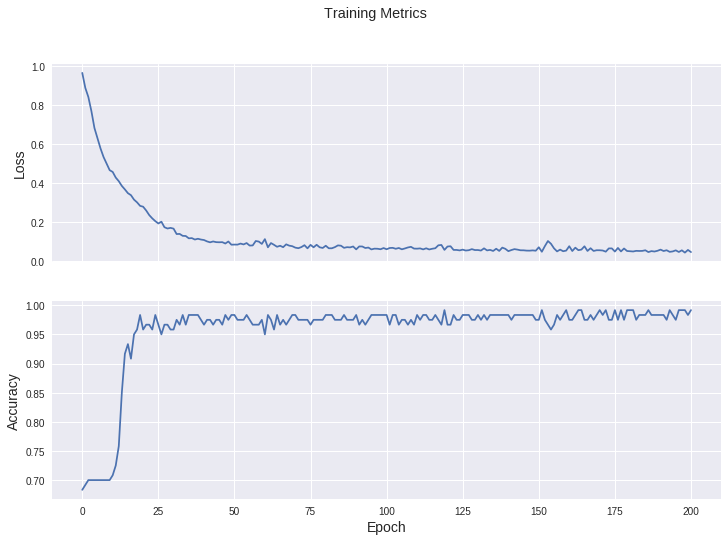

In [20]:
# Visualize the loss function over time
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results);

In [0]:
# Setup the test dataset
test_url = "http://download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

In [0]:
test_dataset = tf.contrib.data.make_csv_dataset(
    test_fp,
    batch_size, 
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(pack_feature_vector)

In [23]:
# Evaluate the model on test dataset
test_accuracy = tfe.metrics.Accuracy()

for (x, y) in test_dataset:
  logits = model(x)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 96.667%


In [24]:
# check last batch
tf.stack([y,prediction],axis=1)

<tf.Tensor: id=128146, shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 1],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]], dtype=int32)>

In [25]:
# Use the trained model to make predictions
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_name[class_idx]
  print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Iris setosa (99.9%)
Example 1 prediction: Iris versicolor (99.9%)
Example 2 prediction: Iris virginica (98.6%)
